# Harmonic Oscillator

#### Basic Imports:

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.signal import find_peaks


#### Animation Functions:

In [2]:
def draw_spring(x0, y0, x1, y1, coils=10, amplitude=0.1):
    """Draws a spring between (x0, y0) and (x1, y1)."""
    num_points=500

    dx = x1 - x0
    dy = y1 - y0
    length = np.sqrt(dx**2 + dy**2)
    angle = np.arctan2(dy, dx)

    x_line = np.linspace(x0, x1, num_points)
    y_line = np.linspace(y0, y1, num_points)

    coil_x = amplitude * np.cos(np.linspace(0, coils * 2 * np.pi, num_points))
    coil_y = amplitude * np.sin(np.linspace(0, coils * 2 * np.pi, num_points))

    x_spring = x_line + coil_x * np.cos(angle + np.pi/2)
    y_spring = y_line + coil_y * np.sin(angle + np.pi/2)

    return x_spring, y_spring  # Return the spring coordinates

def draw_spring_system(spring_loc):
    xs,ys=draw_spring(-2, 0,spring_loc ,0,coils=10)
    plt.plot([-2.0,-2.0],[-0.25,0.25],color='red',linewidth=3,zorder=1)
    plt.plot(xs,ys,color='blue',linewidth=2,zorder=0)
    radius = 0.05
    circle = patches.Circle((spring_loc,0), radius, color='blue', fill=True)
    plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.xlim(-3, 3)
    plt.show()

def animate_spring_system(x):
    fig, ax = plt.subplots()
    ax.plot([-2.0,-2.0],[-0.25,0.25],color='red',linewidth=3,zorder=1)
    line, = ax.plot([], [], lw=2, color='blue',zorder=0)  # Initialize an empty line object

    radius = 0.05
    circle = patches.Circle((0,0), radius, color='blue', fill=True)
    ax.add_artist(circle)
    top_val=np.max(np.abs(x))*1.1
    ax.set_xlim(-3, top_val)    
    ax.set_ylim(-1, 1)  

    def animate(i):
        x1 = x[i]  # x-coordinate changes over time
        xs, ys = draw_spring(-2, 0, x1, 0.0, coils=8, amplitude=0.10) 
        line.set_data(xs, ys)
        circle.center = (x1,0)
        return line,circle,

    ani = animation.FuncAnimation(fig, animate, frames=len(x), blit=True, interval=20,repeat=False) 
    ###save animation as html
    #ani.save('spring_system.html', writer='html')
    display(HTML(ani.to_jshtml()))  
    plt.close() 

Our goal in this assignment is to understand the Harmonic Oscillator 

## Exercise 1. A Single Spring

### a. Simple Harmonic Oscillator

In this part, we will be working with a simple harmonic oscillator.  For the moment, we should think of this as a spring connected to a wall on one end and to a mass $m$ on the other.  We choose the natural equilibrium length of the spring to be 2 and let the x-coordinate at the equilbrium length to be $x=0$ (so the deviation from the equilibrium and the x-coordinate match up).  To draw this spring go ahead an plot
```python
draw_spring_system(0)
```
where the 0 represents that it is at $x=0$.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

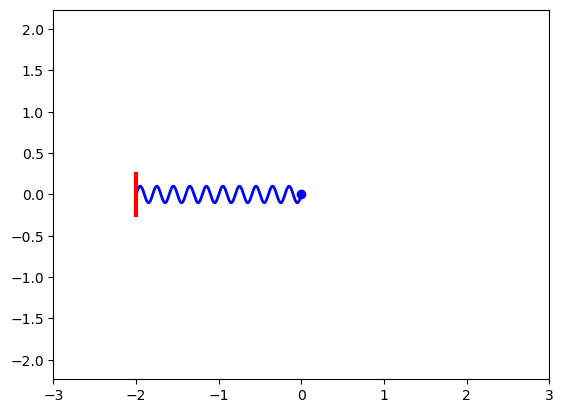

In [3]:
### ANSWER HERE
draw_spring_system(0)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The relevant differential equation for the simple Harmonic oscillator is 

$$
m \ddot{x} = -k x
$$

again, where $x$ represents the amount the spring is displaced away from its equilibrium position.  

To solve this with python, it will be convenient to instead write it out as two first-order equations, 

$$\begin{align}
\dot{x} &= v \\
\dot{v} &= -\frac{k}{m} x
\end{align}
$$

where $v$ is the velocity of the mass.  

These equations can be directly translated into python: 

```python
def equations(t,state,k,m):
  x,v = state
  x_dot = v
  v_dot = -k/m*x
  return [x_dot,v_dot]
```

We can now get python to solve this differential equation for us. 
First, we need to give it some initial conditions. For example, we can stretch the spring out to $x=1$ and set the initial velocity to $v=0$ by writing
```python
initial_state = [1, 0]
```
Then we need to specify for which times $t$ we want to evaluate our differential equation with respect to. Here let's choose a grid of 400 time points between 0 and $16\pi$ as
```python
t = np.linspace(0, 25*np.pi, 400)
```

Finally, we need to pick some values for the parameters
```python
k = 1.3
m = 2.25
```

We can now solve our differential equation with
```python
sol = solve_ivp(equations,[t[0], t[-1]],initial_state,t_eval=t,args=(k,m,))
x = sol.y[0]
v = sol.y[1]
```

Go ahead and solve this differential equation and plot it with
```python
fig, ax1 = plt.subplots()
ax1.plot(t,x) #<-- This is the important line which plots.
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  
plt.show()
```

Notice that your wave-length $\lambda = \frac{2\pi}{\omega}$ where the natural frequency $\omega = \sqrt{k/m}$. 


Also go ahead and plot the velocity. You can plot it separately or if you want to plot it on the same figure so you can match the velocity and time before the `plt.show()` go ahead and do
```python
ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2)  #<--- you can turn up the alpha if it's too dim but I find it annoying to have them both be strong  
ax2.set_ylabel('v(t)', color='r') 
ax2.tick_params('y', colors='r') 
```


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

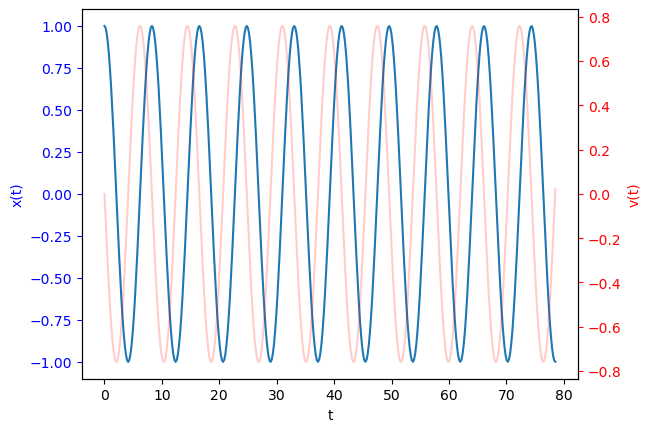

In [4]:
### ANSWER HERE
def equations_a(t,state,k,m):
  x,v = state
  x_dot = v
  v_dot = -k/m*x
  return [x_dot,v_dot]

initial_state = [1, 0]

t = np.linspace(0, 25*np.pi, 400)

k = 1.3
m = 2.25

sol = solve_ivp(equations_a,[t[0], t[-1]],initial_state,t_eval=t,args=(k,m,))
x = sol.y[0]
v = sol.y[1]

fig, ax1 = plt.subplots()
ax1.plot(t,x)
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  

ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2)
ax2.set_ylabel('v(t)', color='r') 
ax2.tick_params('y', colors='r')

plt.show()

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Computing the energy

Compute the energy 
$$
E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2
$$

of your system and show that it is constant. Beware of the plot scale; it helps if you keep your y-limit from zero to one - i.e. `ax1.set_ylim(0,1)`.


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.0, 1.0)

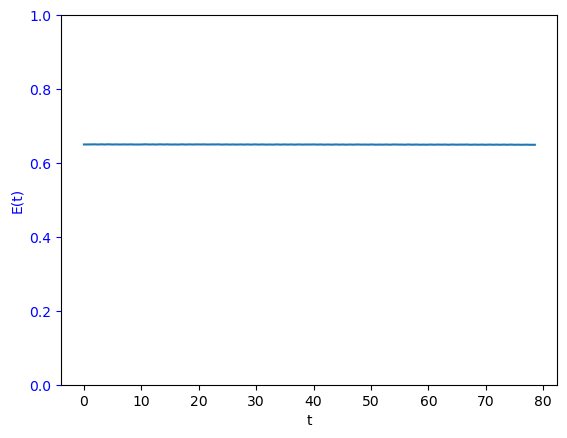

In [5]:
### ANSWER HERE
e = (1/2)*(m*v*v + k*x*x)

fig, ax1 = plt.subplots()
ax1.plot(t,e)
ax1.set_xlabel("t")
ax1.set_ylabel("E(t)",color='b')
ax1.tick_params('y', colors='b')  
ax1.set_ylim(0,1)


 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Animating your spring

Now animate your spring.  You can do this by calling
```python
animate_spring_system(x)
```
on your x-coordinate.

In some cases throughout this notebook, animating might take an annoying while. So instead, you may animate with a lower "frame rate" by calling this function on `x[0::10]`, for example, which samples every 10 elements of $x$.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [6]:
### ANSWER HERE
#animate_spring_system(x[0::5])

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d.  An underdamped Harmonic Oscillator

Now let's introduce some damping. The equation of motion for a damped harmonic oscillator is 

$$
m \ddot{x} = -k x - c v 
$$

Rewrite this as a series of first-order differential equations and modify your `equations(state,t,x,k,m,c)` function to solve this differential equation using the same starting conditions and values for $k$ amd $m$ as earlier. Start by using $c=0.2$. Recall that the dissipation $\gamma=c/(2m\omega_0)$, and $\omega_0 = \sqrt{k/m}$ is the undamped frequency. When $\gamma<1$, as is this case, we have an underdamped oscillator.  

Plot the position and velocity as a function of time. Also animate your spring.  

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

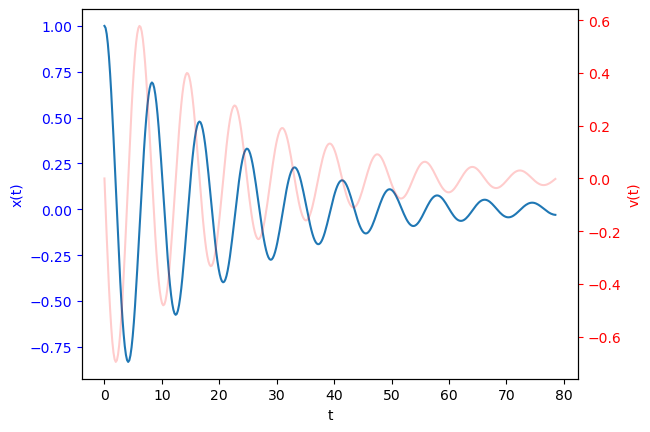

In [7]:
### ANSWER HERE
def equations_d(t,state,k,m,c):
  x,v = state
  x_dot =v
  v_dot = -k/m*x - c/m*v
  return [x_dot,v_dot]


initial_state = [1, 0]

t = np.linspace(0, 25*np.pi, 400)

k = 1.3
m = 2.25
c = 0.2

sol = solve_ivp(equations_d, [t[0],t[-1]],initial_state, t_eval=t, args=(k,m,c,))
x = sol.y[0]
v = sol.y[1]

fig, ax1 = plt.subplots()
ax1.plot(t,x) 
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  

ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2) 
ax2.set_ylabel('v(t)', color='r') 
ax2.tick_params('y', colors='r')

plt.show()
#animate_spring_system(x[0::5])

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now, we would like to check two things explicitly about the damped oscillator:

1) We expect that the period of the damped oscillator should be $2\pi/\omega_d$ where $\omega_d \equiv \omega_0 \sqrt{1-\gamma^2}$ and $\gamma = c/(2m\omega_0)$. Verify this by extracting the peak locations of the undamped oscillator.
 
    To do this, we can use `my_peaks=find_peaks(x)[0].tolist()` and then use `t[my_peaks]` to get the time of the respective peaks. Check that those times are all equidistant and that they happen with the prescribed period. The answer you will actually get if you do this will be reasonable but not super-accurate. You can do better by (a) increasing the number of points in your `linspace` to 4000 (but don't rerun the animation becuase it will be very slow) and/or instead of using the difference in time between two peaks, computing the slope of peaks *x* time elapsed using `np.polyfit(range(0,len(my_peaks)),t[my_peaks],1)`.  

2) Finally, verify that the damped oscillator's strength decays exponentially. We can do this by looking at the peak values (`x[my_peaks]`) and plot them. To tell that something decreases exponentially, you should plot it on a semi-log scale (`ax1.set_yscale('log')`) and see that the plot is linear. 

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [8]:
### ANSWER HERE
# First of all, the corresponding calculated period, to which we should compare the answers:
omega_n = np.sqrt(k/m)
gamma = c/(2*m*omega_n)
omega_d = omega_n*(np.sqrt(1-gamma**2))
print("Calculated period: ",2*np.pi/omega_d)

# calculating the interval between peaks we can see that they are equidistant:

my_peaks = find_peaks(x)[0].tolist()
t_peaks = t[my_peaks]

intervals = t_peaks[1:] - t_peaks[:-1]
print("peak intervals:",intervals)
print("peak intervals mean:",intervals.sum()/len(intervals))

# which is quite reasonable.

Calculated period:  8.2802434714094
peak intervals: [8.26734909 8.26734909 8.26734909 8.26734909 8.26734909 8.26734909
 8.26734909 8.26734909]
peak intervals mean: 8.267349088394191


In [9]:
# now for improvements. As suggested we may refine the time discretization:
t = np.linspace(0, 16*np.pi, 4000)
sol = solve_ivp(equations_d, [t[0],t[-1]],initial_state, t_eval=t, args=(k,m,c,))
x = sol.y[0]
v = sol.y[1]

my_peaks = find_peaks(x)[0].tolist()
t_peaks = t[my_peaks]
intervals = t_peaks[1:] - t_peaks[:-1]
print("peak intervals:",intervals)
print("peak intervals mean:",intervals.sum()/len(intervals))

# we may also use polyfit
fit = np.polyfit(range(0,len(my_peaks)),t[my_peaks],1)
print("polyfit period:",fit[0])
# even better.

peak intervals: [8.28330906 8.28330906 8.27073955 8.28330906 8.28330906]
peak intervals mean: 8.280795159529706
polyfit period: 8.280076901644412


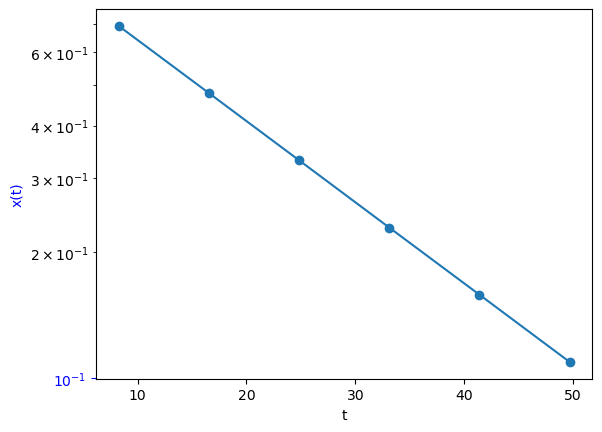

In [10]:
# Finally the analysis of the decay:
fig, ax1 = plt.subplots()
ax1.plot(t[my_peaks],x[my_peaks],marker='o') #<-- This is the important line which plots.
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  
ax1.set_yscale('log')

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e.  An overdamped oscillator

Now we turn to the overdamped oscillator. Find $c$ that gives $\gamma=1.2$ and solve the corresponding ODE. Then consider some value where $\gamma \gg 1$.  For both scenarios plot the position and velocity vs time and animate them.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

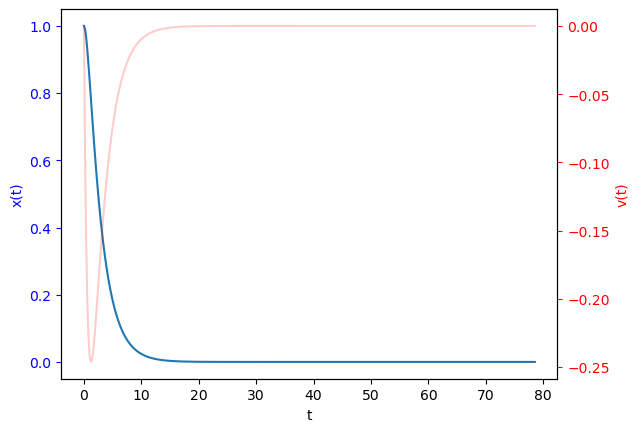

In [11]:
### ANSWER HERE
t = np.linspace(0,25*np.pi,400)
gamma = 1.2
c = gamma*(2*m*omega_n)
sol = solve_ivp(equations_d, [t[0],t[-1]],initial_state, t_eval=t, args=(k,m,c,))
x = sol.y[0]
v = sol.y[1]

fig, ax1 = plt.subplots()
ax1.plot(t,x) 
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  

ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2)  
ax2.set_ylabel('v(t)', color='r') 
ax2.tick_params('y', colors='r')

plt.show()
#animate_spring_system(x[0::5])

# there are no oscillations, so there's no meaningful way to calculate the period, frequency, etc.
# To calculate the decay we would have to resort to a more direct method, such as calculating the total energy, as in (b).

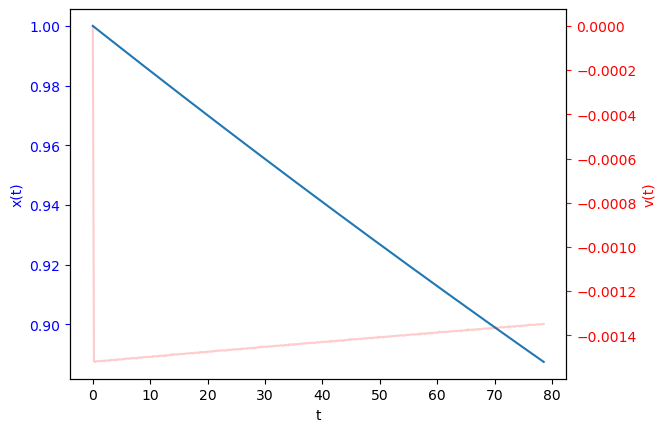

In [12]:
### ANSWER HERE
gamma = 250
c = gamma*(2*m*omega_n)
sol = solve_ivp(equations_d, [t[0],t[-1]],initial_state, t_eval=t, args=(k,m,c,))
x = sol.y[0]
v = sol.y[1]

fig, ax1 = plt.subplots()
ax1.plot(t,x) 
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  

ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2)  
ax2.set_ylabel('v(t)', color='r') 
ax2.tick_params('y', colors='r')

plt.show()
#animate_spring_system(x[0::5])
# the damping supresses the \dot{v} term in the differential system, so the velocity is approximately constant.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### f. Gravity

Now suppose you turn your system vertically in such a way that gravity acts as a constant force on your oscillator.
Modify your equations of motion to include both the force from gravity and a dissipation term.

By running your simulation, compute the equilibrium value for masses `masses=[1.0,2.0,3.0,4.0]`.
Then plot the equilibrium spring location versus the mass and show that the equilbrium position is linear with the mass.  You may find the equilibrium simply by averaging the position, but be sure to disregard any transient effects.

How could you then use this information as a scale?

For concreteness, you may use $g=10,k=1.3,c=0.2$, but that should make no qualitative difference. In fact, your choice of $c$ should make no quantitative difference (why?).


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

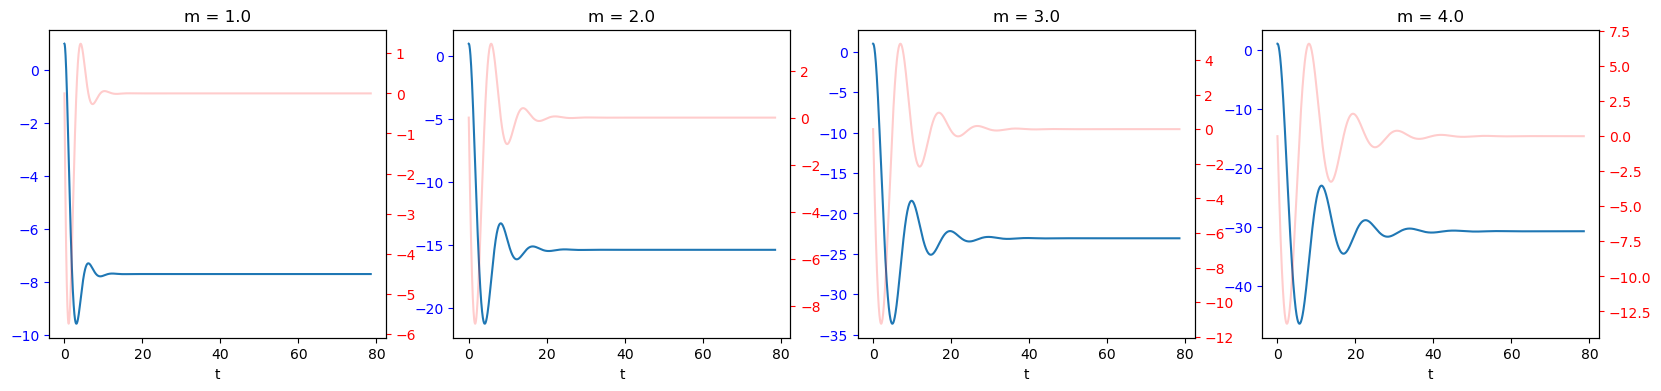

In [13]:
### ANSWER HERE
def equations_f(t,state,k,m,c,g):
  x,v = state
  x_dot = v
  v_dot = -k/m*x - c/m*v -g
  return [x_dot,v_dot]

initial_state = [1, 0]

t = np.linspace(0, 25*np.pi, 4000)

k = 1.3
c = 1
g = 10
m = [1.0,2.0,3.0,4.0]

fig, ax1 = plt.subplots(1,4,figsize=(20,4))
ax2 = ax1.copy()

x = np.zeros((len(m),len(t)))
v = np.zeros((len(m),len(t)))

for i in range(len(m)):
    sol = solve_ivp(equations_f, [t[0],t[-1]],initial_state, t_eval=t, args=(k,m[i],c,g,))
    x[i] = sol.y[0]
    v[i] = sol.y[1]

    ax1[i].plot(t,x[i]) 
    ax1[i].set_xlabel("t")
    #ax1[i].set_ylabel("x(t)",color='b')
    ax1[i].tick_params('y', colors='b')  
    ax1[i].set_title('m = '+str(m[i]))

    ax2[i] = ax1[i].twinx()  
    ax2[i].plot(t, v[i], 'r-',alpha=0.2)  
    #ax2[i].set_ylabel('v(t)', color='r') 
    ax2[i].tick_params('y', colors='r')

plt.show()

[ -7.69230775 -15.38458826 -23.07611001 -30.77517355]


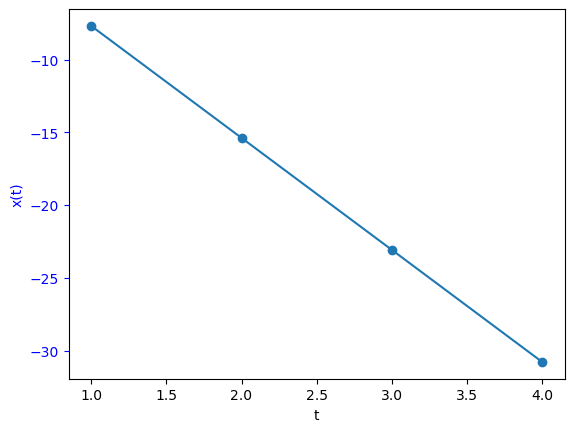

In [14]:
# equilibrium can be found well approximatedly by taking the mean of x
steady = x[:,2000:]
x_eq = steady.mean(axis=1)
print(x_eq)

fig, ax1 = plt.subplots()
ax1.plot(m,x_eq,marker='o') 
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b') 

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>